# problem statement:	Solar power consumption has been recorded by city councils at regular intervals. The reason behind doing so is to understand how businesses are using solar power so that they can cut down on nonrenewable sources of energy and shift towards renewable energy. Based on the data, build a forecasting model, and provide insights on it. 

In [2]:
import pandas as pd

In [3]:
data = pd.read_csv(r"C:/Users/sahit/Downloads/data science/Forecasting/Data Set/solarpower_cumuldaybyday2.csv")

In [4]:
data.head()

,date,cum_power
0,26/10/2011,0.1
1,27/10/2011,10.2
2,28/10/2011,20.2
3,29/10/2011,29.6
4,30/10/2011,34.2


In [5]:
from sqlalchemy import create_engine 

In [6]:
user ="root"
pw = "######"
db = "######"
host = "localhost"

In [7]:
engine = create_engine(f"mysql+pymysql://{user}:{pw}@{host}/{db}")

In [8]:
if not engine.has_table("power"):
    data.to_sql("power",con = engine , index = False)

C:\Users\sahit\AppData\Local\Temp\ipykernel_1380\1211575720.py:1: SADeprecationWarning: The Engine.has_table() method is deprecated and will be removed in a future release.  Please refer to Inspector.has_table(). (deprecated since: 1.4)
  if not engine.has_table("power"):


In [9]:
sql = 'select * from power'

In [10]:
df = pd.read_sql_query(sql,con = engine)

In [11]:
df.head()

,date,cum_power
0,26/10/2011,0.1
1,27/10/2011,10.2
2,28/10/2011,20.2
3,29/10/2011,29.6
4,30/10/2011,34.2


In [12]:
df.isnull().sum()

date         0
cum_power    0
dtype: int64

In [13]:
df.duplicated().sum()

0

In [14]:
df = df.rename(columns={"date":"month"})

In [15]:
df.insert(2,"power",0.1)
for i in range (len(df)):
    if i ==0:
        df['power'][i]=0.1
    else:
        df['power'][i]= df['cum_power'][i]-df['cum_power'][i-1]

C:\Users\sahit\AppData\Local\Temp\ipykernel_1380\2861904938.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['power'][i]=0.1
C:\Users\sahit\AppData\Local\Temp\ipykernel_1380\2861904938.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['power'][i]= df['cum_power'][i]-df['cum_power'][i-1]
C:\Users\sahit\AppData\Local\Temp\ipykernel_1380\2861904938.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['power'][i]= df['cum_powe

C:\Users\sahit\AppData\Local\Temp\ipykernel_1380\2861904938.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['power'][i]= df['cum_power'][i]-df['cum_power'][i-1]
C:\Users\sahit\AppData\Local\Temp\ipykernel_1380\2861904938.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['power'][i]= df['cum_power'][i]-df['cum_power'][i-1]
C:\Users\sahit\AppData\Local\Temp\ipykernel_1380\2861904938.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-

In [16]:
df

,month,cum_power,power
0,26/10/2011,0.1,0.1
1,27/10/2011,10.2,10.1
2,28/10/2011,20.2,10.0
3,29/10/2011,29.6,9.4
4,30/10/2011,34.2,4.6
...,...,...,...
2553,22/10/2018,28101.0,6.0
2554,23/10/2018,28109.0,8.0
2555,24/10/2018,28115.0,6.0
2556,25/10/2018,28117.0,2.0


In [17]:
df = df.drop('cum_power',axis=1)
df

,month,power
0,26/10/2011,0.1
1,27/10/2011,10.1
2,28/10/2011,10.0
3,29/10/2011,9.4
4,30/10/2011,4.6
...,...,...
2553,22/10/2018,6.0
2554,23/10/2018,8.0
2555,24/10/2018,6.0
2556,25/10/2018,2.0


In [18]:
df.month = pd.to_datetime(df.month)

C:\Users\sahit\AppData\Local\Temp\ipykernel_1380\4174306806.py:1: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df.month = pd.to_datetime(df.month)


In [19]:
df.month = sorted(df.month)
df

,month,power
0,2011-10-26,0.1
1,2011-10-27,10.1
2,2011-10-28,10.0
3,2011-10-29,9.4
4,2011-10-30,4.6
...,...,...
2553,2018-10-22,6.0
2554,2018-10-23,8.0
2555,2018-10-24,6.0
2556,2018-10-25,2.0


In [20]:
solar= df.resample("m",on='month').sum()

In [21]:
solar.head()

,power
month,
2011-10-31,38.0
2011-11-30,127.3
2011-12-31,60.9
2012-01-31,75.6
2012-02-29,156.9


In [22]:
month = ['jan','feb','mar','apr','may','jun','jul','aug',"sep",'oct','nov','dec']

In [23]:
dates = pd.date_range(start = '2011-01-01',freq ='MS',periods = len(solar))
solar['months']= dates.month
solar['year']= dates.year
solar.head(12)

,power,months,year
month,,,
2011-10-31,38.0,1,2011
2011-11-30,127.3,2,2011
2011-12-31,60.9,3,2011
2012-01-31,75.6,4,2011
2012-02-29,156.9,5,2011
2012-03-31,337.9,6,2011
2012-04-30,390.3,7,2011
2012-05-31,582.5,8,2011
2012-06-30,500.9,9,2011


In [24]:
import calendar

In [25]:
solar['months'] = solar['months'].apply(lambda x: calendar.month_abbr[x])

In [26]:
solar=solar[['months','year','power']]

In [27]:
solar

,months,year,power
month,,,
2011-10-31,Jan,2011,38.0
2011-11-30,Feb,2011,127.3
2011-12-31,Mar,2011,60.9
2012-01-31,Apr,2011,75.6
2012-02-29,May,2011,156.9
...,...,...,...
2018-06-30,Sep,2017,563.0
2018-07-31,Oct,2017,682.0
2018-08-31,Nov,2017,530.0


In [28]:
import numpy as np

In [29]:
solar["t"] = np.arange(1,len(solar)+1)

In [30]:
solar["t_square"]=solar["t"]*solar['t']

In [31]:
solar['log_power']=np.log(solar['power'])

In [32]:
solar.columns

Index(['months', 'year', 'power', 't', 't_square', 'log_power'], dtype='object')

In [33]:
solar

,months,year,power,t,t_square,log_power
month,,,,,,
2011-10-31,Jan,2011,38.0,1,1,3.637586
2011-11-30,Feb,2011,127.3,2,4,4.846547
2011-12-31,Mar,2011,60.9,3,9,4.109233
2012-01-31,Apr,2011,75.6,4,16,4.325456
2012-02-29,May,2011,156.9,5,25,5.055609
...,...,...,...,...,...,...
2018-06-30,Sep,2017,563.0,81,6561,6.333280
2018-07-31,Oct,2017,682.0,82,6724,6.525030
2018-08-31,Nov,2017,530.0,83,6889,6.272877


In [34]:
dummy = pd.DataFrame(pd.get_dummies(solar['months']))

In [35]:
solar = pd.concat((solar,dummy),axis=1)

In [36]:
solar

,months,year,power,t,t_square,log_power,Apr,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
month,,,,,,,,,,,,,,,,,,
2011-10-31,Jan,2011,38.0,1,1,3.637586,False,False,False,False,True,False,False,False,False,False,False,False
2011-11-30,Feb,2011,127.3,2,4,4.846547,False,False,False,True,False,False,False,False,False,False,False,False
2011-12-31,Mar,2011,60.9,3,9,4.109233,False,False,False,False,False,False,False,True,False,False,False,False
2012-01-31,Apr,2011,75.6,4,16,4.325456,True,False,False,False,False,False,False,False,False,False,False,False
2012-02-29,May,2011,156.9,5,25,5.055609,False,False,False,False,False,False,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-06-30,Sep,2017,563.0,81,6561,6.333280,False,False,False,False,False,False,False,False,False,False,False,True
2018-07-31,Oct,2017,682.0,82,6724,6.525030,False,False,False,False,False,False,False,False,False,False,True,False
2018-08-31,Nov,2017,530.0,83,6889,6.272877,False,False,False,False,False,False,False,False,False,True,False,False


In [37]:
train = solar.head(84)
train

,months,year,power,t,t_square,log_power,Apr,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
month,,,,,,,,,,,,,,,,,,
2011-10-31,Jan,2011,38.0,1,1,3.637586,False,False,False,False,True,False,False,False,False,False,False,False
2011-11-30,Feb,2011,127.3,2,4,4.846547,False,False,False,True,False,False,False,False,False,False,False,False
2011-12-31,Mar,2011,60.9,3,9,4.109233,False,False,False,False,False,False,False,True,False,False,False,False
2012-01-31,Apr,2011,75.6,4,16,4.325456,True,False,False,False,False,False,False,False,False,False,False,False
2012-02-29,May,2011,156.9,5,25,5.055609,False,False,False,False,False,False,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-05-31,Aug,2017,652.0,80,6400,6.480045,False,True,False,False,False,False,False,False,False,False,False,False
2018-06-30,Sep,2017,563.0,81,6561,6.333280,False,False,False,False,False,False,False,False,False,False,False,True
2018-07-31,Oct,2017,682.0,82,6724,6.525030,False,False,False,False,False,False,False,False,False,False,True,False


In [38]:
test = solar.tail(12)
test

,months,year,power,t,t_square,log_power,Apr,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
month,,,,,,,,,,,,,,,,,,
2017-11-30,Feb,2017,97.0,74,5476,4.574711,False,False,False,True,False,False,False,False,False,False,False,False
2017-12-31,Mar,2017,36.0,75,5625,3.583519,False,False,False,False,False,False,False,True,False,False,False,False
2018-01-31,Apr,2017,64.0,76,5776,4.158883,True,False,False,False,False,False,False,False,False,False,False,False
2018-02-28,May,2017,194.0,77,5929,5.267858,False,False,False,False,False,False,False,False,True,False,False,False
2018-03-31,Jun,2017,270.0,78,6084,5.598422,False,False,False,False,False,False,True,False,False,False,False,False
2018-04-30,Jul,2017,439.0,79,6241,6.084499,False,False,False,False,False,True,False,False,False,False,False,False
2018-05-31,Aug,2017,652.0,80,6400,6.480045,False,True,False,False,False,False,False,False,False,False,False,False
2018-06-30,Sep,2017,563.0,81,6561,6.333280,False,False,False,False,False,False,False,False,False,False,False,True
2018-07-31,Oct,2017,682.0,82,6724,6.525030,False,False,False,False,False,False,False,False,False,False,True,False


In [39]:
import statsmodels.formula.api as smf
from statsmodels.tsa.arima.model import ARIMA
import calendar
import statsmodels.api as sm
import pmdarima as pm

In [40]:
linear = smf.ols('power ~ t', data=train).fit()
predlin=pd.Series(linear.predict(pd.DataFrame(test['t'])))
rmselin=np.sqrt((np.mean(np.array(test['power'])-np.array(predlin))**2))
rmselin

32.1710205527996

In [41]:
quad=smf.ols('power~t+t_square',data=train).fit()
predquad=pd.Series(quad.predict(pd.DataFrame(test[['t','t_square']])))
rmsequad=np.sqrt(np.mean((np.array(test['power'])-np.array(predquad))**2))
rmsequad

219.6850584954639

In [42]:
expo=smf.ols('log_power~t',data=train).fit()
predexp=pd.Series(expo.predict(pd.DataFrame(test['t'])))
rmseexpo=np.sqrt(np.mean((np.array(test['power'])-np.array(np.exp(predexp)))**2))
rmseexpo

221.09843570153885

In [43]:
additive= smf.ols('power~Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov',data=train).fit()
predadd= pd.Series(additive.predict(test[['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']]))
rmseadd=np.sqrt(np.mean((np.array(test['power'])-np.array(predadd))**2))
rmseadd

45.03827850409284

In [44]:
addlinear= smf.ols('power~t+Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov',data=train).fit()
predmul=pd.Series(addlinear.predict(test[['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec','t']]))
rmseaddlinear=np.sqrt(np.mean((np.array(test['power'])-np.array(predadd))**2))
rmseaddlinear

45.03827850409284

In [45]:
addquad=smf.ols('power~t+t_square+Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov',data=train).fit()
predmuladd= pd.Series(addquad.predict(test[['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec','t','t_square']]))
rmseaddquad=np.sqrt(np.mean((np.array(test['power'])-np.array(predmuladd))**2))
rmseaddquad

43.1600641382452

In [46]:
mulsea=smf.ols('log_power~Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov',data=train).fit()
predmul= pd.Series(mulsea.predict(pd.DataFrame(test[['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']])))
rmsemul= np.sqrt(np.mean((np.array(test['power'])-np.array(np.exp(predmul)))**2))
rmsemul

47.83880641471983

In [47]:
mullin= smf.ols('log_power~t+Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov',data=train).fit()
predmulquad= pd.Series(mullin.predict(test[['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec','t']]))
rmsemulin=np.sqrt(np.mean((np.array(test['power'])-np.array(np.exp(predmulquad)))**2))
rmsemulin

41.29541747342331

In [48]:
mul_quad= smf.ols('log_power~t+t_square+Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov',data=train).fit()
pred_mul_quad= pd.Series(mul_quad.predict(test[['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec','t','t_square']]))
rmse_mul_quad=np.sqrt(np.mean((np.array(test['power'])-np.array(np.exp(pred_mul_quad)))**2))
rmse_mul_quad

54.36058363067215

In [49]:
data={'Model':pd.Series(['rmse_mul_quad','rmseadd','rmseaddlinear','rmseaddquad','rmseexpo','rmselin','rmsemul','rmsemulin','rmsequad']),'Values':pd.Series([rmse_mul_quad,rmseadd,rmseaddlinear,rmseaddquad,rmseexpo,rmselin,rmsemul,rmsemulin,rmsequad])}
Rmse=pd.DataFrame(data)
Rmse

,Model,Values
0,rmse_mul_quad,54.360584
1,rmseadd,45.038279
2,rmseaddlinear,45.038279
3,rmseaddquad,43.160064
4,rmseexpo,221.098436
5,rmselin,32.171021
6,rmsemul,47.838806
7,rmsemulin,41.295417
8,rmsequad,219.685058


In [50]:
Predict_Solar = solar.copy()

In [51]:
final = smf.ols('power ~ t',data = solar).fit()

In [52]:
pred = pd.Series(final.predict(Predict_Solar))
pred

month
2011-10-31    281.310561
2011-11-30    282.489441
2011-12-31    283.668321
2012-01-31    284.847201
2012-02-29    286.026082
                 ...    
2018-06-30    375.620977
2018-07-31    376.799857
2018-08-31    377.978738
2018-09-30    379.157618
2018-10-31    380.336498
Length: 85, dtype: float64

In [53]:
Predict_Solar['prediction']=pred

In [54]:
residuals=pd.DataFrame(np.array(solar["power"]-np.array(pred)))

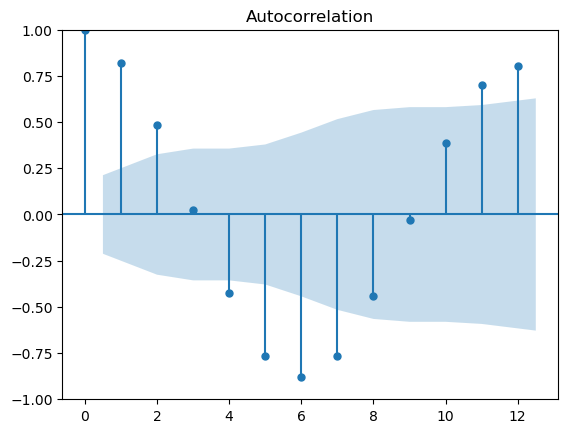

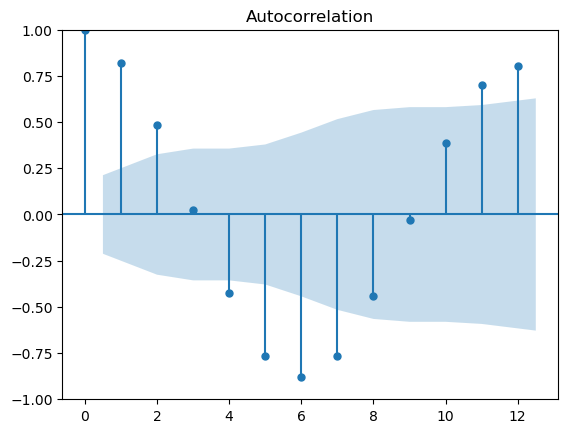

In [55]:
sm.graphics.tsa.plot_acf(residuals.values.squeeze(), lags=12)

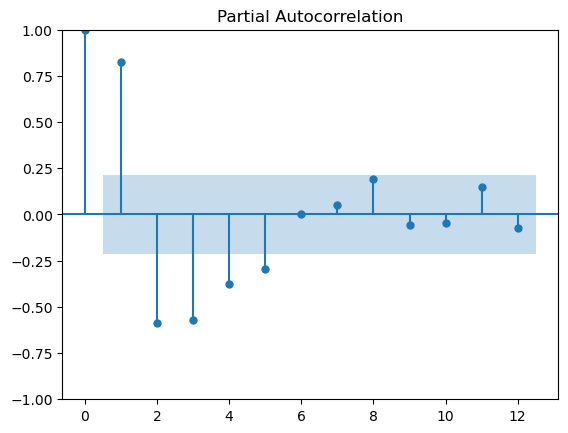

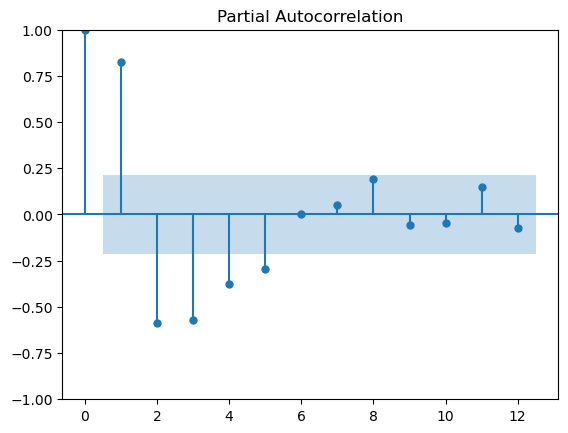

In [56]:
sm.graphics.tsa.plot_pacf(solar.power.values.squeeze(), lags=12)

In [57]:
model1 = ARIMA(solar["power"], order = (2,0,2))

In [58]:
res1 = model1.fit()

C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [59]:
print(res1.summary())

                               SARIMAX Results                                
Dep. Variable:                  power   No. Observations:                   85
Model:                 ARIMA(2, 0, 2)   Log Likelihood                -452.863
Date:                Thu, 20 Jun 2024   AIC                            917.725
Time:                        15:44:36   BIC                            932.381
Sample:                    10-31-2011   HQIC                           923.620
                         - 10-31-2018                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        330.8308      5.418     61.057      0.000     320.211     341.451
ar.L1          1.7325      0.001   1280.801      0.000       1.730       1.735
ar.L2         -1.0000      0.000  -2360.838      0.0

In [60]:
pas = solar['power']

In [61]:
model_arima = ARIMA(residuals,order = (2,0,2)).fit()

C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [62]:
forecasterrors=model_arima.forecast(steps=12)
forecasterrors

85   -225.383648
86   -277.369410
87   -254.671677
88   -163.374618
89    -27.945716
90    115.321487
91    228.033678
92    279.986569
93    257.258953
94    165.943007
95     30.511275
96   -112.741943
Name: predicted_mean, dtype: float64

In [63]:
ar_model = pm.auto_arima(solar["power"], start_p = 0, start_q = 0,
                      max_p = 16, max_q = 16,
                      m = 1,              
                      d = None,           
                      seasonal = False,   
                      start_P = 0, trace = True,
                      error_action = 'warn', stepwise = True)

Performing stepwise search to minimize aic
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=1257.062, Time=0.02 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=1055.740, Time=0.03 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=inf, Time=0.03 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=1024.930, Time=0.03 sec
 ARIMA(3,0,0)(0,0,0)[0]             : AIC=1022.907, Time=0.07 sec
 ARIMA(4,0,0)(0,0,0)[0]             : AIC=1020.103, Time=0.10 sec
 ARIMA(5,0,0)(0,0,0)[0]             : AIC=1009.514, Time=0.08 sec
 ARIMA(6,0,0)(0,0,0)[0]             : AIC=992.345, Time=0.14 sec
 ARIMA(7,0,0)(0,0,0)[0]             : AIC=inf, Time=0.20 sec
 ARIMA(6,0,1)(0,0,0)[0]             : AIC=949.882, Time=0.41 sec
 ARIMA(5,0,1)(0,0,0)[0]             : AIC=965.870, Time=0.31 sec
 ARIMA(7,0,1)(0,0,0)[0]             : AIC=941.602, Time=0.36 sec
 ARIMA(8,0,1)(0,0,0)[0]             : AIC=939.270, Time=0.39 sec
 ARIMA(8,0,0)(0,0,0)[0]             : AIC=inf, Time=0.41 sec
 ARIMA(9,0,1)(0,0,0)[0]             : AIC=939.909, Ti

In [64]:
model1 = ARIMA(solar['power'],order = (2,1,3))

In [65]:
res1 = model1.fit()

C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [66]:
print(res1.summary())

                               SARIMAX Results                                
Dep. Variable:                  power   No. Observations:                   85
Model:                 ARIMA(2, 1, 3)   Log Likelihood                -450.339
Date:                Thu, 20 Jun 2024   AIC                            912.679
Time:                        15:44:46   BIC                            927.264
Sample:                    10-31-2011   HQIC                           918.542
                         - 10-31-2018                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.7326      0.001   1214.750      0.000       1.730       1.735
ar.L2         -1.0000      0.000  -2715.138      0.000      -1.001      -0.999
ma.L1         -2.7115      0.146    -18.532      0.0

In [67]:
start = pd.to_datetime('2019-01-01')

In [68]:
end = pd.to_datetime('2019-12-31')

In [69]:
forecast = res1.predict(start = start, end = end)
forecast

2019-01-31     70.791206
2019-02-28    162.039173
2019-03-31    298.738966
2019-04-30    444.338741
2019-05-31    559.907722
2019-06-30    614.545598
2019-07-31    593.644505
2019-08-31    502.794553
2019-09-30    366.288726
2019-10-31    220.627008
2019-11-30    104.756742
2019-12-31     49.658803
Freq: M, Name: predicted_mean, dtype: float64